# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

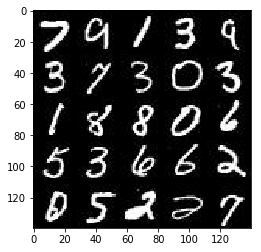

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

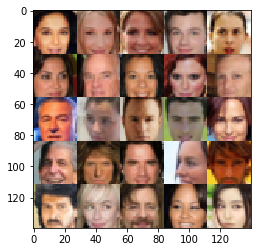

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], "input_real")
    input_z = tf.placeholder(tf.float32, [None, z_dim], "input_z")
    learning_rate = tf.placeholder(tf.float32, None, "learning_rate")

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(update_ops):
        t_vars = tf.trainable_variables()
        
        d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
        g_vars = [var for var in t_vars if var.name.startswith('generator')]

        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 0.6147... Generator Loss: 15.5313
Epoch 1/2... Batch 20... Discriminator Loss: 0.6721... Generator Loss: 2.2275
Epoch 1/2... Batch 30... Discriminator Loss: 0.8363... Generator Loss: 8.4872
Epoch 1/2... Batch 40... Discriminator Loss: 1.5582... Generator Loss: 0.5980
Epoch 1/2... Batch 50... Discriminator Loss: 0.8690... Generator Loss: 5.0974
Epoch 1/2... Batch 60... Discriminator Loss: 0.4407... Generator Loss: 3.5632
Epoch 1/2... Batch 70... Discriminator Loss: 1.1083... Generator Loss: 0.7896
Epoch 1/2... Batch 80... Discriminator Loss: 0.6412... Generator Loss: 1.8320
Epoch 1/2... Batch 90... Discriminator Loss: 0.5469... Generator Loss: 3.5315
Epoch 1/2... Batch 100... Discriminator Loss: 0.7559... Generator Loss: 2.6938


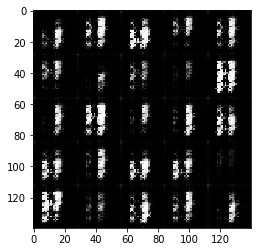

Epoch 1/2... Batch 110... Discriminator Loss: 0.6899... Generator Loss: 1.4138
Epoch 1/2... Batch 120... Discriminator Loss: 0.7741... Generator Loss: 1.7904
Epoch 1/2... Batch 130... Discriminator Loss: 0.5543... Generator Loss: 2.3625
Epoch 1/2... Batch 140... Discriminator Loss: 1.0584... Generator Loss: 8.6081
Epoch 1/2... Batch 150... Discriminator Loss: 0.6292... Generator Loss: 1.8713
Epoch 1/2... Batch 160... Discriminator Loss: 0.7530... Generator Loss: 1.7598
Epoch 1/2... Batch 170... Discriminator Loss: 0.6226... Generator Loss: 2.1588
Epoch 1/2... Batch 180... Discriminator Loss: 0.5176... Generator Loss: 2.9697
Epoch 1/2... Batch 190... Discriminator Loss: 0.4936... Generator Loss: 3.9020
Epoch 1/2... Batch 200... Discriminator Loss: 1.5391... Generator Loss: 0.6724


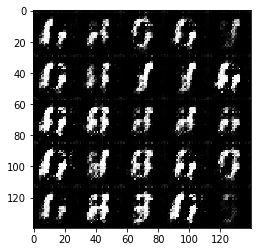

Epoch 1/2... Batch 210... Discriminator Loss: 0.6914... Generator Loss: 1.5768
Epoch 1/2... Batch 220... Discriminator Loss: 0.6829... Generator Loss: 2.1402
Epoch 1/2... Batch 230... Discriminator Loss: 0.9396... Generator Loss: 1.1353
Epoch 1/2... Batch 240... Discriminator Loss: 0.7032... Generator Loss: 2.5281
Epoch 1/2... Batch 250... Discriminator Loss: 0.9777... Generator Loss: 3.8247
Epoch 1/2... Batch 260... Discriminator Loss: 0.6382... Generator Loss: 2.1442
Epoch 1/2... Batch 270... Discriminator Loss: 0.7103... Generator Loss: 2.4765
Epoch 1/2... Batch 280... Discriminator Loss: 0.6404... Generator Loss: 4.1993
Epoch 1/2... Batch 290... Discriminator Loss: 0.6906... Generator Loss: 2.0721
Epoch 1/2... Batch 300... Discriminator Loss: 0.7646... Generator Loss: 3.1366


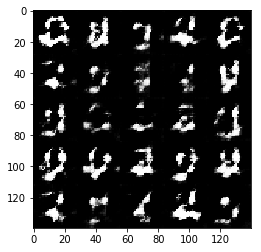

Epoch 1/2... Batch 310... Discriminator Loss: 0.7411... Generator Loss: 3.1260
Epoch 1/2... Batch 320... Discriminator Loss: 0.9605... Generator Loss: 1.2854
Epoch 1/2... Batch 330... Discriminator Loss: 0.9620... Generator Loss: 3.5147
Epoch 1/2... Batch 340... Discriminator Loss: 0.9638... Generator Loss: 1.0377
Epoch 1/2... Batch 350... Discriminator Loss: 0.7075... Generator Loss: 3.6663
Epoch 1/2... Batch 360... Discriminator Loss: 1.0623... Generator Loss: 0.9039
Epoch 1/2... Batch 370... Discriminator Loss: 1.0774... Generator Loss: 1.0548
Epoch 1/2... Batch 380... Discriminator Loss: 0.7499... Generator Loss: 1.9794
Epoch 1/2... Batch 390... Discriminator Loss: 0.8406... Generator Loss: 1.5914
Epoch 1/2... Batch 400... Discriminator Loss: 0.8492... Generator Loss: 1.3418


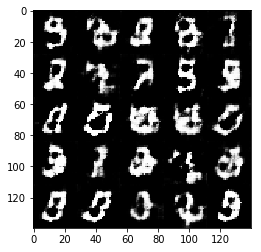

Epoch 1/2... Batch 410... Discriminator Loss: 0.8211... Generator Loss: 2.4401
Epoch 1/2... Batch 420... Discriminator Loss: 0.8323... Generator Loss: 1.4420
Epoch 1/2... Batch 430... Discriminator Loss: 0.9818... Generator Loss: 1.2241
Epoch 1/2... Batch 440... Discriminator Loss: 1.1748... Generator Loss: 0.7603
Epoch 1/2... Batch 450... Discriminator Loss: 0.8976... Generator Loss: 2.9841
Epoch 1/2... Batch 460... Discriminator Loss: 0.7590... Generator Loss: 1.8205
Epoch 2/2... Batch 10... Discriminator Loss: 0.7255... Generator Loss: 1.9588
Epoch 2/2... Batch 20... Discriminator Loss: 0.8284... Generator Loss: 1.4968
Epoch 2/2... Batch 30... Discriminator Loss: 1.1571... Generator Loss: 0.9243
Epoch 2/2... Batch 40... Discriminator Loss: 1.2692... Generator Loss: 2.5838
Epoch 2/2... Batch 50... Discriminator Loss: 0.9437... Generator Loss: 1.6667
Epoch 2/2... Batch 60... Discriminator Loss: 0.8037... Generator Loss: 2.2658
Epoch 2/2... Batch 70... Discriminator Loss: 0.8722... Gen

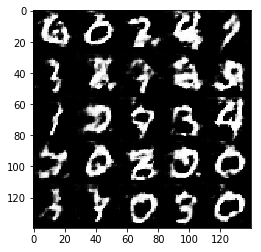

Epoch 2/2... Batch 110... Discriminator Loss: 1.5122... Generator Loss: 3.3616
Epoch 2/2... Batch 120... Discriminator Loss: 0.9082... Generator Loss: 2.3360
Epoch 2/2... Batch 130... Discriminator Loss: 0.8029... Generator Loss: 1.4922
Epoch 2/2... Batch 140... Discriminator Loss: 0.8223... Generator Loss: 1.8051
Epoch 2/2... Batch 150... Discriminator Loss: 1.0462... Generator Loss: 1.1601
Epoch 2/2... Batch 160... Discriminator Loss: 0.9132... Generator Loss: 1.4077
Epoch 2/2... Batch 170... Discriminator Loss: 1.1412... Generator Loss: 0.8842
Epoch 2/2... Batch 180... Discriminator Loss: 1.1383... Generator Loss: 0.7633
Epoch 2/2... Batch 190... Discriminator Loss: 1.1869... Generator Loss: 2.7855
Epoch 2/2... Batch 200... Discriminator Loss: 0.9691... Generator Loss: 1.0799


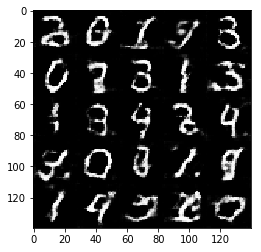

Epoch 2/2... Batch 210... Discriminator Loss: 0.9504... Generator Loss: 1.2412
Epoch 2/2... Batch 220... Discriminator Loss: 0.7684... Generator Loss: 1.7591
Epoch 2/2... Batch 230... Discriminator Loss: 0.9210... Generator Loss: 1.0755
Epoch 2/2... Batch 240... Discriminator Loss: 0.8863... Generator Loss: 1.5670
Epoch 2/2... Batch 250... Discriminator Loss: 0.8665... Generator Loss: 1.3094
Epoch 2/2... Batch 260... Discriminator Loss: 0.9025... Generator Loss: 1.2351
Epoch 2/2... Batch 270... Discriminator Loss: 1.9025... Generator Loss: 3.7776
Epoch 2/2... Batch 280... Discriminator Loss: 0.9249... Generator Loss: 1.4600
Epoch 2/2... Batch 290... Discriminator Loss: 0.8519... Generator Loss: 1.5212
Epoch 2/2... Batch 300... Discriminator Loss: 1.0004... Generator Loss: 1.3237


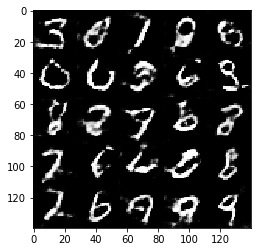

Epoch 2/2... Batch 310... Discriminator Loss: 0.8435... Generator Loss: 1.3847
Epoch 2/2... Batch 320... Discriminator Loss: 0.8331... Generator Loss: 1.5228
Epoch 2/2... Batch 330... Discriminator Loss: 0.9929... Generator Loss: 0.9689
Epoch 2/2... Batch 340... Discriminator Loss: 1.3494... Generator Loss: 0.5751
Epoch 2/2... Batch 350... Discriminator Loss: 1.0087... Generator Loss: 1.0982
Epoch 2/2... Batch 360... Discriminator Loss: 0.8117... Generator Loss: 2.0085
Epoch 2/2... Batch 370... Discriminator Loss: 0.9822... Generator Loss: 1.7371
Epoch 2/2... Batch 380... Discriminator Loss: 0.9342... Generator Loss: 1.1683
Epoch 2/2... Batch 390... Discriminator Loss: 0.8524... Generator Loss: 1.4875
Epoch 2/2... Batch 400... Discriminator Loss: 1.3151... Generator Loss: 0.6330


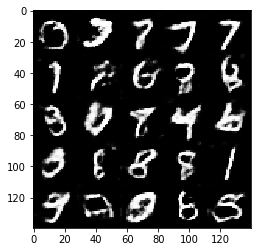

Epoch 2/2... Batch 410... Discriminator Loss: 1.0604... Generator Loss: 2.1717
Epoch 2/2... Batch 420... Discriminator Loss: 1.1853... Generator Loss: 0.7241
Epoch 2/2... Batch 430... Discriminator Loss: 0.8534... Generator Loss: 1.5190
Epoch 2/2... Batch 440... Discriminator Loss: 0.9916... Generator Loss: 0.9785
Epoch 2/2... Batch 450... Discriminator Loss: 1.0583... Generator Loss: 1.5982
Epoch 2/2... Batch 460... Discriminator Loss: 0.8881... Generator Loss: 1.7269


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 2.5523... Generator Loss: 16.0377
Epoch 1/1... Batch 20... Discriminator Loss: 1.0747... Generator Loss: 11.8129
Epoch 1/1... Batch 30... Discriminator Loss: 0.6186... Generator Loss: 3.7179
Epoch 1/1... Batch 40... Discriminator Loss: 1.0429... Generator Loss: 11.4366
Epoch 1/1... Batch 50... Discriminator Loss: 0.8294... Generator Loss: 1.3619
Epoch 1/1... Batch 60... Discriminator Loss: 1.3184... Generator Loss: 6.6975
Epoch 1/1... Batch 70... Discriminator Loss: 0.6252... Generator Loss: 4.7280
Epoch 1/1... Batch 80... Discriminator Loss: 0.5486... Generator Loss: 3.7562
Epoch 1/1... Batch 90... Discriminator Loss: 1.7972... Generator Loss: 0.4419
Epoch 1/1... Batch 100... Discriminator Loss: 0.4704... Generator Loss: 2.9928


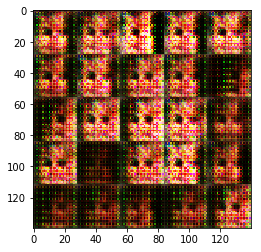

Epoch 1/1... Batch 110... Discriminator Loss: 2.9721... Generator Loss: 9.1322
Epoch 1/1... Batch 120... Discriminator Loss: 0.4776... Generator Loss: 5.2726
Epoch 1/1... Batch 130... Discriminator Loss: 0.5012... Generator Loss: 3.5840
Epoch 1/1... Batch 140... Discriminator Loss: 0.9086... Generator Loss: 1.3862
Epoch 1/1... Batch 150... Discriminator Loss: 0.8442... Generator Loss: 1.5070
Epoch 1/1... Batch 160... Discriminator Loss: 1.2168... Generator Loss: 0.7075
Epoch 1/1... Batch 170... Discriminator Loss: 0.9258... Generator Loss: 1.1498
Epoch 1/1... Batch 180... Discriminator Loss: 3.0432... Generator Loss: 4.4396
Epoch 1/1... Batch 190... Discriminator Loss: 0.9162... Generator Loss: 1.2708
Epoch 1/1... Batch 200... Discriminator Loss: 1.6040... Generator Loss: 0.9540


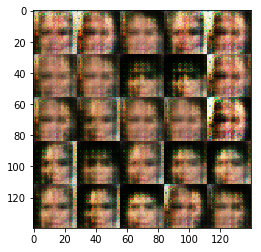

Epoch 1/1... Batch 210... Discriminator Loss: 2.3422... Generator Loss: 3.2667
Epoch 1/1... Batch 220... Discriminator Loss: 1.4946... Generator Loss: 0.7213
Epoch 1/1... Batch 230... Discriminator Loss: 1.4766... Generator Loss: 0.7659
Epoch 1/1... Batch 240... Discriminator Loss: 1.1131... Generator Loss: 1.0657
Epoch 1/1... Batch 250... Discriminator Loss: 0.8655... Generator Loss: 1.7787
Epoch 1/1... Batch 260... Discriminator Loss: 0.7131... Generator Loss: 1.6750
Epoch 1/1... Batch 270... Discriminator Loss: 1.1048... Generator Loss: 1.5238
Epoch 1/1... Batch 280... Discriminator Loss: 1.3751... Generator Loss: 1.2152
Epoch 1/1... Batch 290... Discriminator Loss: 1.6858... Generator Loss: 0.5260
Epoch 1/1... Batch 300... Discriminator Loss: 1.1146... Generator Loss: 0.9320


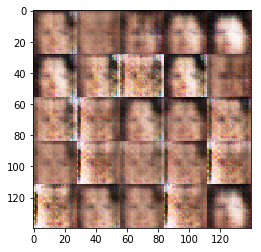

Epoch 1/1... Batch 310... Discriminator Loss: 1.1032... Generator Loss: 1.2642
Epoch 1/1... Batch 320... Discriminator Loss: 1.1570... Generator Loss: 1.1458
Epoch 1/1... Batch 330... Discriminator Loss: 0.9086... Generator Loss: 1.5198
Epoch 1/1... Batch 340... Discriminator Loss: 0.8356... Generator Loss: 1.4424
Epoch 1/1... Batch 350... Discriminator Loss: 1.2119... Generator Loss: 1.0846
Epoch 1/1... Batch 360... Discriminator Loss: 1.5113... Generator Loss: 0.6945
Epoch 1/1... Batch 370... Discriminator Loss: 1.4796... Generator Loss: 0.5646
Epoch 1/1... Batch 380... Discriminator Loss: 1.2205... Generator Loss: 0.8332
Epoch 1/1... Batch 390... Discriminator Loss: 1.7509... Generator Loss: 0.5218
Epoch 1/1... Batch 400... Discriminator Loss: 0.9153... Generator Loss: 1.1763


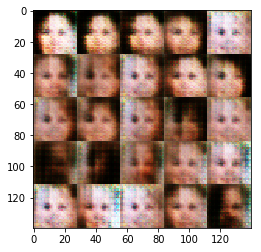

Epoch 1/1... Batch 410... Discriminator Loss: 0.9203... Generator Loss: 1.6990
Epoch 1/1... Batch 420... Discriminator Loss: 0.8312... Generator Loss: 1.2888
Epoch 1/1... Batch 430... Discriminator Loss: 0.8405... Generator Loss: 1.7188
Epoch 1/1... Batch 440... Discriminator Loss: 1.3074... Generator Loss: 2.7100
Epoch 1/1... Batch 450... Discriminator Loss: 0.7363... Generator Loss: 1.5680
Epoch 1/1... Batch 460... Discriminator Loss: 1.0764... Generator Loss: 1.2409
Epoch 1/1... Batch 470... Discriminator Loss: 1.5657... Generator Loss: 1.6973
Epoch 1/1... Batch 480... Discriminator Loss: 1.0066... Generator Loss: 1.4200
Epoch 1/1... Batch 490... Discriminator Loss: 1.0723... Generator Loss: 1.1594
Epoch 1/1... Batch 500... Discriminator Loss: 1.1558... Generator Loss: 0.9791


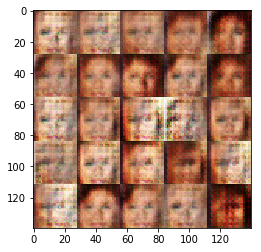

Epoch 1/1... Batch 510... Discriminator Loss: 1.2591... Generator Loss: 1.0076
Epoch 1/1... Batch 520... Discriminator Loss: 1.2556... Generator Loss: 1.0743
Epoch 1/1... Batch 530... Discriminator Loss: 1.1801... Generator Loss: 0.8761
Epoch 1/1... Batch 540... Discriminator Loss: 1.0378... Generator Loss: 1.1327
Epoch 1/1... Batch 550... Discriminator Loss: 1.2819... Generator Loss: 0.6919
Epoch 1/1... Batch 560... Discriminator Loss: 1.0559... Generator Loss: 1.1378
Epoch 1/1... Batch 570... Discriminator Loss: 1.3601... Generator Loss: 0.8799
Epoch 1/1... Batch 580... Discriminator Loss: 0.8658... Generator Loss: 1.5591
Epoch 1/1... Batch 590... Discriminator Loss: 1.2200... Generator Loss: 0.6804
Epoch 1/1... Batch 600... Discriminator Loss: 1.1059... Generator Loss: 1.8138


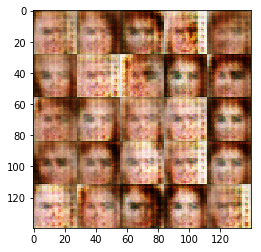

Epoch 1/1... Batch 610... Discriminator Loss: 1.2704... Generator Loss: 0.5975
Epoch 1/1... Batch 620... Discriminator Loss: 0.9404... Generator Loss: 1.1379
Epoch 1/1... Batch 630... Discriminator Loss: 0.9500... Generator Loss: 1.4308
Epoch 1/1... Batch 640... Discriminator Loss: 1.0016... Generator Loss: 1.1746
Epoch 1/1... Batch 650... Discriminator Loss: 0.9229... Generator Loss: 1.1948
Epoch 1/1... Batch 660... Discriminator Loss: 0.9516... Generator Loss: 1.1668
Epoch 1/1... Batch 670... Discriminator Loss: 2.6824... Generator Loss: 0.2229
Epoch 1/1... Batch 680... Discriminator Loss: 1.2133... Generator Loss: 0.9089
Epoch 1/1... Batch 690... Discriminator Loss: 1.0706... Generator Loss: 1.0806
Epoch 1/1... Batch 700... Discriminator Loss: 0.9767... Generator Loss: 1.0932


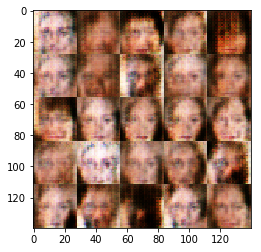

Epoch 1/1... Batch 710... Discriminator Loss: 1.0343... Generator Loss: 1.8451
Epoch 1/1... Batch 720... Discriminator Loss: 1.0087... Generator Loss: 1.1749
Epoch 1/1... Batch 730... Discriminator Loss: 1.9961... Generator Loss: 0.2981
Epoch 1/1... Batch 740... Discriminator Loss: 1.0730... Generator Loss: 1.1483
Epoch 1/1... Batch 750... Discriminator Loss: 1.0399... Generator Loss: 1.2713
Epoch 1/1... Batch 760... Discriminator Loss: 1.1341... Generator Loss: 1.5219
Epoch 1/1... Batch 770... Discriminator Loss: 1.4552... Generator Loss: 0.5048
Epoch 1/1... Batch 780... Discriminator Loss: 0.9928... Generator Loss: 1.0620
Epoch 1/1... Batch 790... Discriminator Loss: 1.0767... Generator Loss: 1.3048
Epoch 1/1... Batch 800... Discriminator Loss: 0.8847... Generator Loss: 1.6744


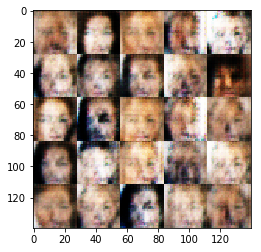

Epoch 1/1... Batch 810... Discriminator Loss: 0.8179... Generator Loss: 1.6238
Epoch 1/1... Batch 820... Discriminator Loss: 1.5440... Generator Loss: 0.5059
Epoch 1/1... Batch 830... Discriminator Loss: 1.3173... Generator Loss: 0.6450
Epoch 1/1... Batch 840... Discriminator Loss: 0.9947... Generator Loss: 1.1678
Epoch 1/1... Batch 850... Discriminator Loss: 2.2456... Generator Loss: 3.5921
Epoch 1/1... Batch 860... Discriminator Loss: 1.0632... Generator Loss: 0.9737
Epoch 1/1... Batch 870... Discriminator Loss: 0.9447... Generator Loss: 1.5010
Epoch 1/1... Batch 880... Discriminator Loss: 1.5440... Generator Loss: 0.4546
Epoch 1/1... Batch 890... Discriminator Loss: 1.0834... Generator Loss: 0.9461
Epoch 1/1... Batch 900... Discriminator Loss: 1.0799... Generator Loss: 0.8886


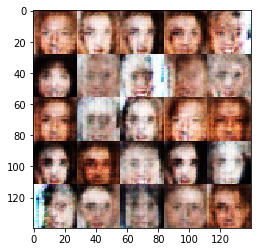

Epoch 1/1... Batch 910... Discriminator Loss: 1.2990... Generator Loss: 1.0152
Epoch 1/1... Batch 920... Discriminator Loss: 1.8489... Generator Loss: 2.7682
Epoch 1/1... Batch 930... Discriminator Loss: 0.9744... Generator Loss: 1.2395
Epoch 1/1... Batch 940... Discriminator Loss: 1.1593... Generator Loss: 1.1488
Epoch 1/1... Batch 950... Discriminator Loss: 1.1093... Generator Loss: 0.9451
Epoch 1/1... Batch 960... Discriminator Loss: 0.9942... Generator Loss: 1.3858
Epoch 1/1... Batch 970... Discriminator Loss: 0.9348... Generator Loss: 1.2154
Epoch 1/1... Batch 980... Discriminator Loss: 1.1698... Generator Loss: 0.8347
Epoch 1/1... Batch 990... Discriminator Loss: 1.2452... Generator Loss: 2.0428
Epoch 1/1... Batch 1000... Discriminator Loss: 1.0688... Generator Loss: 1.3921


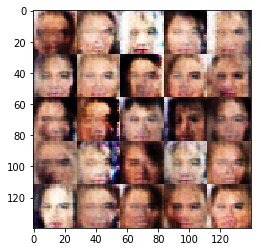

Epoch 1/1... Batch 1010... Discriminator Loss: 0.9878... Generator Loss: 1.4118
Epoch 1/1... Batch 1020... Discriminator Loss: 0.9564... Generator Loss: 1.1425
Epoch 1/1... Batch 1030... Discriminator Loss: 1.2217... Generator Loss: 0.8450
Epoch 1/1... Batch 1040... Discriminator Loss: 1.2471... Generator Loss: 0.6685
Epoch 1/1... Batch 1050... Discriminator Loss: 1.2550... Generator Loss: 0.8517
Epoch 1/1... Batch 1060... Discriminator Loss: 1.3499... Generator Loss: 2.4902
Epoch 1/1... Batch 1070... Discriminator Loss: 1.6101... Generator Loss: 0.4195
Epoch 1/1... Batch 1080... Discriminator Loss: 1.1359... Generator Loss: 1.2325
Epoch 1/1... Batch 1090... Discriminator Loss: 0.9453... Generator Loss: 1.1013
Epoch 1/1... Batch 1100... Discriminator Loss: 1.1603... Generator Loss: 1.8056


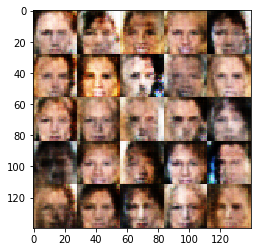

Epoch 1/1... Batch 1110... Discriminator Loss: 1.4625... Generator Loss: 2.1771
Epoch 1/1... Batch 1120... Discriminator Loss: 1.0362... Generator Loss: 0.9151
Epoch 1/1... Batch 1130... Discriminator Loss: 1.1852... Generator Loss: 1.2508
Epoch 1/1... Batch 1140... Discriminator Loss: 1.0450... Generator Loss: 1.1989
Epoch 1/1... Batch 1150... Discriminator Loss: 1.0917... Generator Loss: 1.2961
Epoch 1/1... Batch 1160... Discriminator Loss: 1.5058... Generator Loss: 0.5003
Epoch 1/1... Batch 1170... Discriminator Loss: 1.2994... Generator Loss: 0.6871
Epoch 1/1... Batch 1180... Discriminator Loss: 1.3517... Generator Loss: 0.6713
Epoch 1/1... Batch 1190... Discriminator Loss: 1.3110... Generator Loss: 0.6415
Epoch 1/1... Batch 1200... Discriminator Loss: 1.0386... Generator Loss: 0.8611


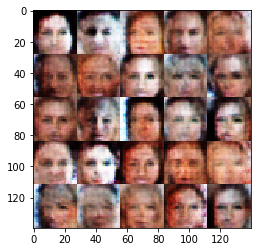

Epoch 1/1... Batch 1210... Discriminator Loss: 1.2207... Generator Loss: 1.3164
Epoch 1/1... Batch 1220... Discriminator Loss: 1.1765... Generator Loss: 1.8172
Epoch 1/1... Batch 1230... Discriminator Loss: 1.0498... Generator Loss: 1.0698
Epoch 1/1... Batch 1240... Discriminator Loss: 1.1715... Generator Loss: 0.8511
Epoch 1/1... Batch 1250... Discriminator Loss: 0.9479... Generator Loss: 1.3609
Epoch 1/1... Batch 1260... Discriminator Loss: 1.1789... Generator Loss: 0.8050
Epoch 1/1... Batch 1270... Discriminator Loss: 1.0437... Generator Loss: 0.9585
Epoch 1/1... Batch 1280... Discriminator Loss: 1.2753... Generator Loss: 0.7153
Epoch 1/1... Batch 1290... Discriminator Loss: 0.8973... Generator Loss: 1.3229
Epoch 1/1... Batch 1300... Discriminator Loss: 1.4357... Generator Loss: 2.1793


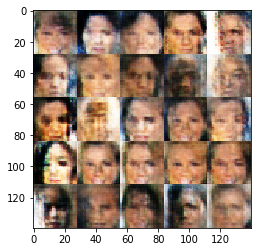

Epoch 1/1... Batch 1310... Discriminator Loss: 1.1786... Generator Loss: 1.8455
Epoch 1/1... Batch 1320... Discriminator Loss: 1.1060... Generator Loss: 1.7191
Epoch 1/1... Batch 1330... Discriminator Loss: 0.9820... Generator Loss: 1.4642
Epoch 1/1... Batch 1340... Discriminator Loss: 1.5033... Generator Loss: 0.4974
Epoch 1/1... Batch 1350... Discriminator Loss: 0.9966... Generator Loss: 1.2276
Epoch 1/1... Batch 1360... Discriminator Loss: 0.9609... Generator Loss: 1.2504
Epoch 1/1... Batch 1370... Discriminator Loss: 1.1954... Generator Loss: 0.8098
Epoch 1/1... Batch 1380... Discriminator Loss: 1.0770... Generator Loss: 1.6789
Epoch 1/1... Batch 1390... Discriminator Loss: 0.9687... Generator Loss: 1.1213
Epoch 1/1... Batch 1400... Discriminator Loss: 1.1949... Generator Loss: 0.7097


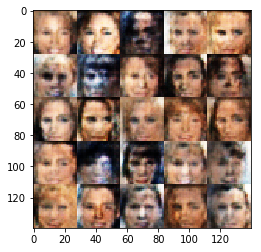

Epoch 1/1... Batch 1410... Discriminator Loss: 1.1746... Generator Loss: 1.6243
Epoch 1/1... Batch 1420... Discriminator Loss: 0.9234... Generator Loss: 1.2111
Epoch 1/1... Batch 1430... Discriminator Loss: 1.0712... Generator Loss: 0.9625
Epoch 1/1... Batch 1440... Discriminator Loss: 0.9492... Generator Loss: 0.9991
Epoch 1/1... Batch 1450... Discriminator Loss: 1.0979... Generator Loss: 1.1617
Epoch 1/1... Batch 1460... Discriminator Loss: 0.9966... Generator Loss: 1.6713
Epoch 1/1... Batch 1470... Discriminator Loss: 1.3049... Generator Loss: 0.6025
Epoch 1/1... Batch 1480... Discriminator Loss: 0.9183... Generator Loss: 1.1763
Epoch 1/1... Batch 1490... Discriminator Loss: 1.0028... Generator Loss: 0.9972
Epoch 1/1... Batch 1500... Discriminator Loss: 1.0561... Generator Loss: 1.1050


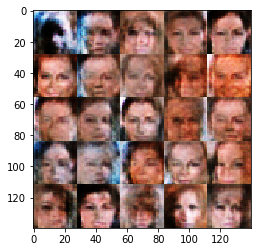

Epoch 1/1... Batch 1510... Discriminator Loss: 1.3659... Generator Loss: 0.6436
Epoch 1/1... Batch 1520... Discriminator Loss: 1.2222... Generator Loss: 1.0522
Epoch 1/1... Batch 1530... Discriminator Loss: 1.0034... Generator Loss: 1.1875
Epoch 1/1... Batch 1540... Discriminator Loss: 1.0321... Generator Loss: 1.4732
Epoch 1/1... Batch 1550... Discriminator Loss: 1.1612... Generator Loss: 0.7435
Epoch 1/1... Batch 1560... Discriminator Loss: 1.4334... Generator Loss: 2.2542
Epoch 1/1... Batch 1570... Discriminator Loss: 1.1810... Generator Loss: 0.9477
Epoch 1/1... Batch 1580... Discriminator Loss: 1.1780... Generator Loss: 1.9432
Epoch 1/1... Batch 1590... Discriminator Loss: 0.8595... Generator Loss: 1.7228
Epoch 1/1... Batch 1600... Discriminator Loss: 1.1727... Generator Loss: 0.7913


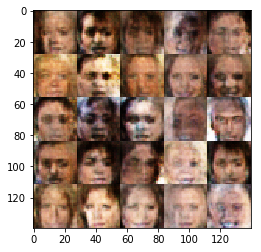

Epoch 1/1... Batch 1610... Discriminator Loss: 1.1333... Generator Loss: 0.8396
Epoch 1/1... Batch 1620... Discriminator Loss: 1.2004... Generator Loss: 1.0868
Epoch 1/1... Batch 1630... Discriminator Loss: 1.0021... Generator Loss: 1.1739
Epoch 1/1... Batch 1640... Discriminator Loss: 1.3002... Generator Loss: 1.5784
Epoch 1/1... Batch 1650... Discriminator Loss: 0.8594... Generator Loss: 1.2388
Epoch 1/1... Batch 1660... Discriminator Loss: 1.0446... Generator Loss: 1.1733
Epoch 1/1... Batch 1670... Discriminator Loss: 1.1102... Generator Loss: 1.1203
Epoch 1/1... Batch 1680... Discriminator Loss: 0.8067... Generator Loss: 1.5514
Epoch 1/1... Batch 1690... Discriminator Loss: 1.3430... Generator Loss: 0.6449
Epoch 1/1... Batch 1700... Discriminator Loss: 0.8694... Generator Loss: 1.4357


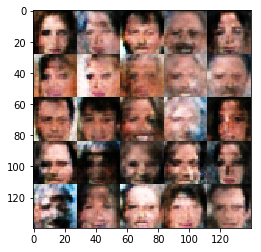

Epoch 1/1... Batch 1710... Discriminator Loss: 1.0561... Generator Loss: 1.4202
Epoch 1/1... Batch 1720... Discriminator Loss: 1.4043... Generator Loss: 2.2570
Epoch 1/1... Batch 1730... Discriminator Loss: 1.1376... Generator Loss: 1.8255
Epoch 1/1... Batch 1740... Discriminator Loss: 1.0472... Generator Loss: 1.0080
Epoch 1/1... Batch 1750... Discriminator Loss: 1.0129... Generator Loss: 1.1319
Epoch 1/1... Batch 1760... Discriminator Loss: 0.9495... Generator Loss: 1.1096
Epoch 1/1... Batch 1770... Discriminator Loss: 1.1731... Generator Loss: 0.8952
Epoch 1/1... Batch 1780... Discriminator Loss: 0.9610... Generator Loss: 1.0857
Epoch 1/1... Batch 1790... Discriminator Loss: 1.1349... Generator Loss: 0.9833
Epoch 1/1... Batch 1800... Discriminator Loss: 1.0209... Generator Loss: 1.1033


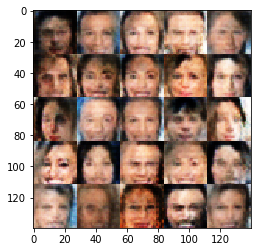

Epoch 1/1... Batch 1810... Discriminator Loss: 1.0522... Generator Loss: 1.2210
Epoch 1/1... Batch 1820... Discriminator Loss: 0.9627... Generator Loss: 1.0867
Epoch 1/1... Batch 1830... Discriminator Loss: 1.0572... Generator Loss: 0.9846
Epoch 1/1... Batch 1840... Discriminator Loss: 1.0427... Generator Loss: 1.3067
Epoch 1/1... Batch 1850... Discriminator Loss: 0.9716... Generator Loss: 1.4224
Epoch 1/1... Batch 1860... Discriminator Loss: 1.2503... Generator Loss: 0.7180
Epoch 1/1... Batch 1870... Discriminator Loss: 1.1376... Generator Loss: 1.0016
Epoch 1/1... Batch 1880... Discriminator Loss: 1.0268... Generator Loss: 1.0730
Epoch 1/1... Batch 1890... Discriminator Loss: 1.2508... Generator Loss: 1.4246
Epoch 1/1... Batch 1900... Discriminator Loss: 1.0903... Generator Loss: 1.4145


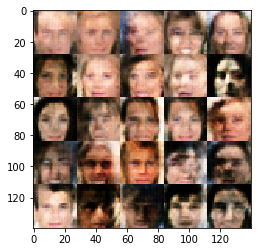

Epoch 1/1... Batch 1910... Discriminator Loss: 1.1808... Generator Loss: 0.8146
Epoch 1/1... Batch 1920... Discriminator Loss: 1.1138... Generator Loss: 0.8944
Epoch 1/1... Batch 1930... Discriminator Loss: 1.0354... Generator Loss: 1.0758
Epoch 1/1... Batch 1940... Discriminator Loss: 1.3859... Generator Loss: 0.5409
Epoch 1/1... Batch 1950... Discriminator Loss: 1.0800... Generator Loss: 0.9357
Epoch 1/1... Batch 1960... Discriminator Loss: 1.0875... Generator Loss: 1.7313
Epoch 1/1... Batch 1970... Discriminator Loss: 1.1114... Generator Loss: 1.0589
Epoch 1/1... Batch 1980... Discriminator Loss: 1.1022... Generator Loss: 0.9018
Epoch 1/1... Batch 1990... Discriminator Loss: 1.1063... Generator Loss: 1.5446
Epoch 1/1... Batch 2000... Discriminator Loss: 1.1947... Generator Loss: 1.0430


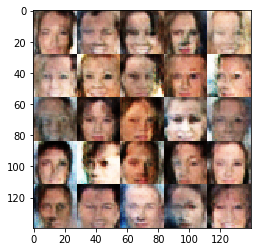

Epoch 1/1... Batch 2010... Discriminator Loss: 1.0079... Generator Loss: 2.6280
Epoch 1/1... Batch 2020... Discriminator Loss: 1.0893... Generator Loss: 0.9902
Epoch 1/1... Batch 2030... Discriminator Loss: 0.9818... Generator Loss: 1.4301
Epoch 1/1... Batch 2040... Discriminator Loss: 0.9995... Generator Loss: 1.2017
Epoch 1/1... Batch 2050... Discriminator Loss: 1.2645... Generator Loss: 0.6549
Epoch 1/1... Batch 2060... Discriminator Loss: 0.9303... Generator Loss: 1.2578
Epoch 1/1... Batch 2070... Discriminator Loss: 1.0768... Generator Loss: 1.1414
Epoch 1/1... Batch 2080... Discriminator Loss: 1.4166... Generator Loss: 0.4956
Epoch 1/1... Batch 2090... Discriminator Loss: 1.2593... Generator Loss: 1.9575
Epoch 1/1... Batch 2100... Discriminator Loss: 1.6018... Generator Loss: 2.3463


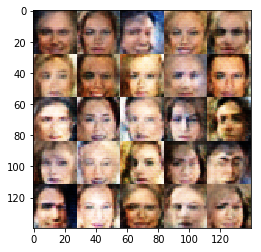

Epoch 1/1... Batch 2110... Discriminator Loss: 1.1631... Generator Loss: 1.7243
Epoch 1/1... Batch 2120... Discriminator Loss: 0.9681... Generator Loss: 1.4200
Epoch 1/1... Batch 2130... Discriminator Loss: 1.0660... Generator Loss: 0.8952
Epoch 1/1... Batch 2140... Discriminator Loss: 0.9334... Generator Loss: 1.3463
Epoch 1/1... Batch 2150... Discriminator Loss: 0.9242... Generator Loss: 1.7551
Epoch 1/1... Batch 2160... Discriminator Loss: 1.3358... Generator Loss: 0.5953
Epoch 1/1... Batch 2170... Discriminator Loss: 1.1676... Generator Loss: 0.7121
Epoch 1/1... Batch 2180... Discriminator Loss: 1.1190... Generator Loss: 0.9211
Epoch 1/1... Batch 2190... Discriminator Loss: 1.0637... Generator Loss: 1.0170
Epoch 1/1... Batch 2200... Discriminator Loss: 1.2332... Generator Loss: 2.1789


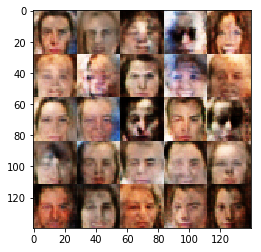

Epoch 1/1... Batch 2210... Discriminator Loss: 1.1197... Generator Loss: 1.3184
Epoch 1/1... Batch 2220... Discriminator Loss: 1.1755... Generator Loss: 1.2645
Epoch 1/1... Batch 2230... Discriminator Loss: 1.2514... Generator Loss: 0.6143
Epoch 1/1... Batch 2240... Discriminator Loss: 0.9981... Generator Loss: 1.2268
Epoch 1/1... Batch 2250... Discriminator Loss: 1.3879... Generator Loss: 0.5689
Epoch 1/1... Batch 2260... Discriminator Loss: 1.0449... Generator Loss: 1.5349
Epoch 1/1... Batch 2270... Discriminator Loss: 1.2485... Generator Loss: 0.7612
Epoch 1/1... Batch 2280... Discriminator Loss: 1.1929... Generator Loss: 0.9178
Epoch 1/1... Batch 2290... Discriminator Loss: 1.0420... Generator Loss: 1.1887
Epoch 1/1... Batch 2300... Discriminator Loss: 1.0937... Generator Loss: 0.8932


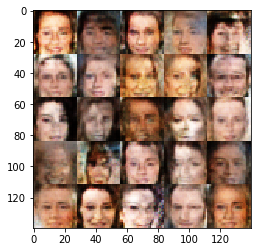

Epoch 1/1... Batch 2310... Discriminator Loss: 1.3391... Generator Loss: 2.2995
Epoch 1/1... Batch 2320... Discriminator Loss: 1.3392... Generator Loss: 0.6484
Epoch 1/1... Batch 2330... Discriminator Loss: 1.0808... Generator Loss: 1.5027
Epoch 1/1... Batch 2340... Discriminator Loss: 1.0670... Generator Loss: 1.0478
Epoch 1/1... Batch 2350... Discriminator Loss: 1.1974... Generator Loss: 0.7710
Epoch 1/1... Batch 2360... Discriminator Loss: 1.0175... Generator Loss: 1.4761
Epoch 1/1... Batch 2370... Discriminator Loss: 1.0632... Generator Loss: 1.1530
Epoch 1/1... Batch 2380... Discriminator Loss: 1.1081... Generator Loss: 0.8514
Epoch 1/1... Batch 2390... Discriminator Loss: 1.3364... Generator Loss: 0.5698
Epoch 1/1... Batch 2400... Discriminator Loss: 1.6717... Generator Loss: 0.3844


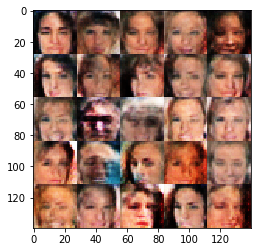

Epoch 1/1... Batch 2410... Discriminator Loss: 1.1121... Generator Loss: 1.8284
Epoch 1/1... Batch 2420... Discriminator Loss: 1.1806... Generator Loss: 1.1035
Epoch 1/1... Batch 2430... Discriminator Loss: 1.0922... Generator Loss: 0.9486
Epoch 1/1... Batch 2440... Discriminator Loss: 1.5322... Generator Loss: 0.4432
Epoch 1/1... Batch 2450... Discriminator Loss: 1.0712... Generator Loss: 1.3427
Epoch 1/1... Batch 2460... Discriminator Loss: 1.0498... Generator Loss: 1.3242
Epoch 1/1... Batch 2470... Discriminator Loss: 1.1988... Generator Loss: 0.7597
Epoch 1/1... Batch 2480... Discriminator Loss: 1.0826... Generator Loss: 1.3653
Epoch 1/1... Batch 2490... Discriminator Loss: 1.2042... Generator Loss: 0.6998
Epoch 1/1... Batch 2500... Discriminator Loss: 1.0819... Generator Loss: 1.4745


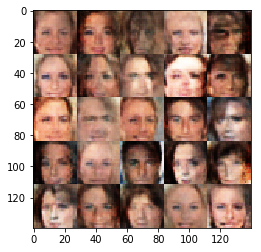

Epoch 1/1... Batch 2510... Discriminator Loss: 0.9777... Generator Loss: 1.1569
Epoch 1/1... Batch 2520... Discriminator Loss: 1.2684... Generator Loss: 0.6778
Epoch 1/1... Batch 2530... Discriminator Loss: 1.1664... Generator Loss: 1.1805
Epoch 1/1... Batch 2540... Discriminator Loss: 0.9229... Generator Loss: 1.1651
Epoch 1/1... Batch 2550... Discriminator Loss: 1.4329... Generator Loss: 2.4791
Epoch 1/1... Batch 2560... Discriminator Loss: 1.1843... Generator Loss: 1.0111
Epoch 1/1... Batch 2570... Discriminator Loss: 0.8754... Generator Loss: 1.4805
Epoch 1/1... Batch 2580... Discriminator Loss: 1.2421... Generator Loss: 1.8508
Epoch 1/1... Batch 2590... Discriminator Loss: 1.1493... Generator Loss: 1.8169
Epoch 1/1... Batch 2600... Discriminator Loss: 1.4060... Generator Loss: 0.5355


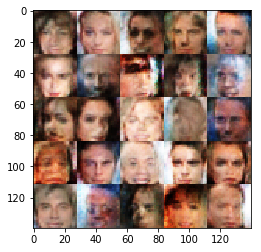

Epoch 1/1... Batch 2610... Discriminator Loss: 1.1125... Generator Loss: 1.0373
Epoch 1/1... Batch 2620... Discriminator Loss: 1.3403... Generator Loss: 0.5807
Epoch 1/1... Batch 2630... Discriminator Loss: 1.1360... Generator Loss: 0.8829
Epoch 1/1... Batch 2640... Discriminator Loss: 0.9843... Generator Loss: 1.0059
Epoch 1/1... Batch 2650... Discriminator Loss: 1.2018... Generator Loss: 0.8173
Epoch 1/1... Batch 2660... Discriminator Loss: 1.0364... Generator Loss: 1.1035
Epoch 1/1... Batch 2670... Discriminator Loss: 1.3971... Generator Loss: 0.6075
Epoch 1/1... Batch 2680... Discriminator Loss: 1.2919... Generator Loss: 0.5716
Epoch 1/1... Batch 2690... Discriminator Loss: 1.1196... Generator Loss: 1.2507
Epoch 1/1... Batch 2700... Discriminator Loss: 1.2058... Generator Loss: 1.2808


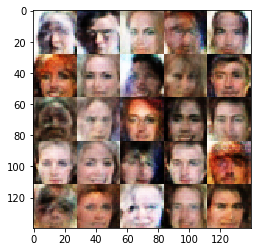

Epoch 1/1... Batch 2710... Discriminator Loss: 0.8980... Generator Loss: 1.2354
Epoch 1/1... Batch 2720... Discriminator Loss: 1.3182... Generator Loss: 0.6116
Epoch 1/1... Batch 2730... Discriminator Loss: 1.1884... Generator Loss: 0.7335
Epoch 1/1... Batch 2740... Discriminator Loss: 1.2881... Generator Loss: 0.5941
Epoch 1/1... Batch 2750... Discriminator Loss: 1.1598... Generator Loss: 1.9388
Epoch 1/1... Batch 2760... Discriminator Loss: 1.0493... Generator Loss: 0.9141
Epoch 1/1... Batch 2770... Discriminator Loss: 1.2839... Generator Loss: 0.7583
Epoch 1/1... Batch 2780... Discriminator Loss: 0.8926... Generator Loss: 1.4771
Epoch 1/1... Batch 2790... Discriminator Loss: 1.4253... Generator Loss: 0.5203
Epoch 1/1... Batch 2800... Discriminator Loss: 1.3038... Generator Loss: 0.8009


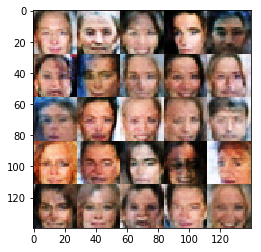

Epoch 1/1... Batch 2810... Discriminator Loss: 1.1537... Generator Loss: 0.7936
Epoch 1/1... Batch 2820... Discriminator Loss: 1.1570... Generator Loss: 0.7575
Epoch 1/1... Batch 2830... Discriminator Loss: 1.2253... Generator Loss: 2.0335
Epoch 1/1... Batch 2840... Discriminator Loss: 1.5718... Generator Loss: 0.4281
Epoch 1/1... Batch 2850... Discriminator Loss: 1.1070... Generator Loss: 0.9120
Epoch 1/1... Batch 2860... Discriminator Loss: 1.1600... Generator Loss: 0.8512
Epoch 1/1... Batch 2870... Discriminator Loss: 1.0190... Generator Loss: 1.3190
Epoch 1/1... Batch 2880... Discriminator Loss: 1.1501... Generator Loss: 1.3487
Epoch 1/1... Batch 2890... Discriminator Loss: 1.1944... Generator Loss: 0.7632
Epoch 1/1... Batch 2900... Discriminator Loss: 1.1148... Generator Loss: 1.0363


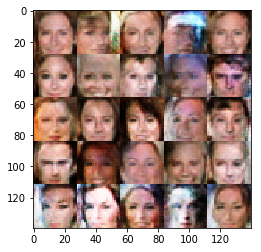

Epoch 1/1... Batch 2910... Discriminator Loss: 1.0923... Generator Loss: 1.0215
Epoch 1/1... Batch 2920... Discriminator Loss: 1.2958... Generator Loss: 1.8385
Epoch 1/1... Batch 2930... Discriminator Loss: 1.1712... Generator Loss: 0.9636
Epoch 1/1... Batch 2940... Discriminator Loss: 1.1404... Generator Loss: 0.9693
Epoch 1/1... Batch 2950... Discriminator Loss: 1.0556... Generator Loss: 1.3338
Epoch 1/1... Batch 2960... Discriminator Loss: 1.2738... Generator Loss: 0.6009
Epoch 1/1... Batch 2970... Discriminator Loss: 1.0178... Generator Loss: 1.5002
Epoch 1/1... Batch 2980... Discriminator Loss: 0.9212... Generator Loss: 1.3176
Epoch 1/1... Batch 2990... Discriminator Loss: 1.0973... Generator Loss: 1.0375
Epoch 1/1... Batch 3000... Discriminator Loss: 1.0408... Generator Loss: 0.8694


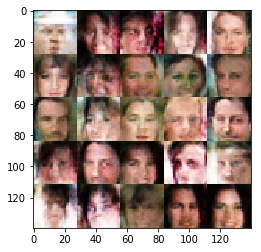

Epoch 1/1... Batch 3010... Discriminator Loss: 1.0498... Generator Loss: 1.1267
Epoch 1/1... Batch 3020... Discriminator Loss: 1.2492... Generator Loss: 0.6469
Epoch 1/1... Batch 3030... Discriminator Loss: 1.0627... Generator Loss: 1.4878
Epoch 1/1... Batch 3040... Discriminator Loss: 1.3060... Generator Loss: 1.8819
Epoch 1/1... Batch 3050... Discriminator Loss: 1.0572... Generator Loss: 1.4509
Epoch 1/1... Batch 3060... Discriminator Loss: 1.1951... Generator Loss: 0.7338
Epoch 1/1... Batch 3070... Discriminator Loss: 1.1335... Generator Loss: 0.9370
Epoch 1/1... Batch 3080... Discriminator Loss: 1.1470... Generator Loss: 0.7627
Epoch 1/1... Batch 3090... Discriminator Loss: 1.3070... Generator Loss: 1.3335
Epoch 1/1... Batch 3100... Discriminator Loss: 1.1276... Generator Loss: 0.9062


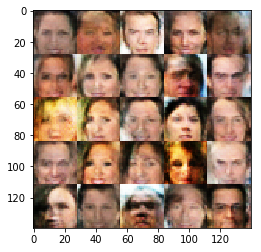

Epoch 1/1... Batch 3110... Discriminator Loss: 1.1084... Generator Loss: 0.8895
Epoch 1/1... Batch 3120... Discriminator Loss: 0.9408... Generator Loss: 1.6042
Epoch 1/1... Batch 3130... Discriminator Loss: 1.2705... Generator Loss: 0.6198
Epoch 1/1... Batch 3140... Discriminator Loss: 1.0293... Generator Loss: 1.1796
Epoch 1/1... Batch 3150... Discriminator Loss: 1.3279... Generator Loss: 0.5643
Epoch 1/1... Batch 3160... Discriminator Loss: 1.0162... Generator Loss: 1.0049


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.